In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
print(df.shape, 'shape', '\n')
print(df.dtypes, 'types', '\n')
print(df['quality'].unique(), 'uniq', '\n')
print(df['quality'].isnull().sum(), 'isna')

(1599, 12) shape 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object types 

[5 6 7 4 8 3] uniq 

0 isna


In [6]:
from collections import Counter
print(sorted(Counter(df['quality']).items()))

[(3, 10), (4, 53), (5, 681), (6, 638), (7, 199), (8, 18)]


<Axes: xlabel='quality', ylabel='fixed acidity'>

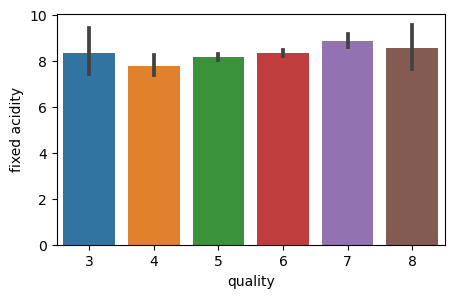

In [7]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

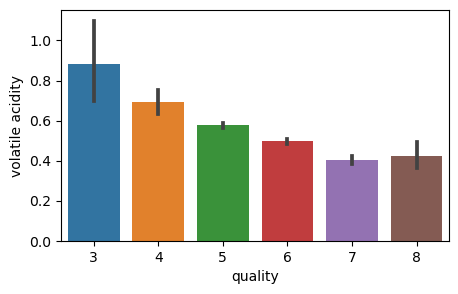

In [8]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

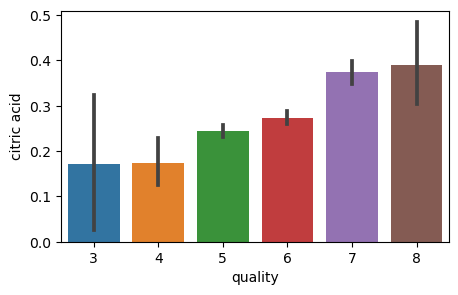

In [9]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

<Axes: xlabel='quality', ylabel='residual sugar'>

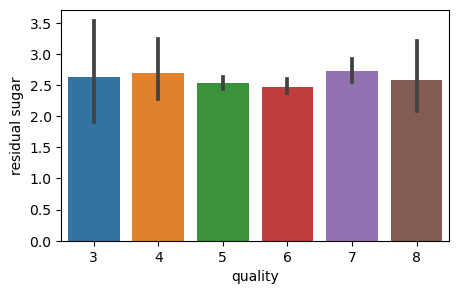

In [10]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

<Axes: xlabel='quality', ylabel='chlorides'>

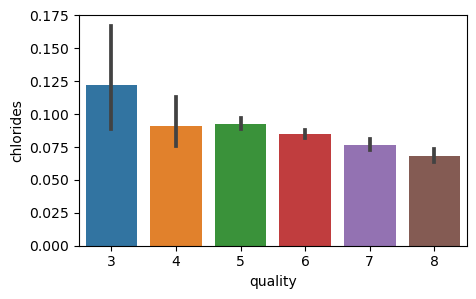

In [11]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

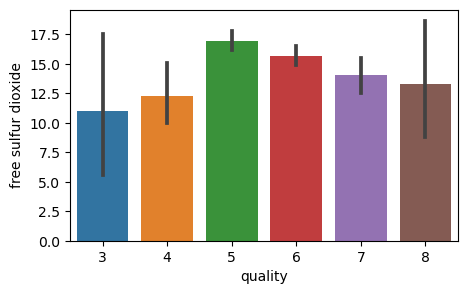

In [12]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

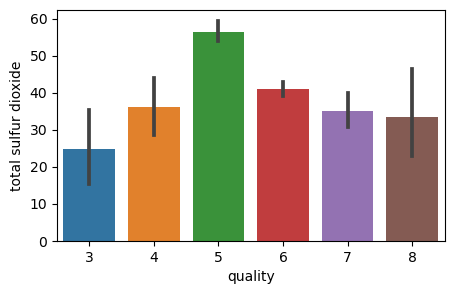

In [13]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='sulphates'>

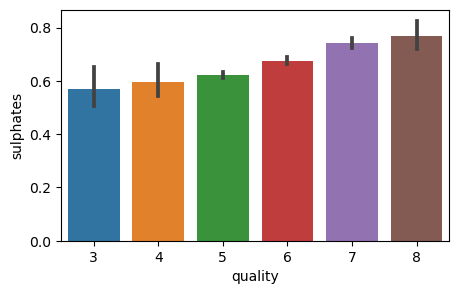

In [14]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

<Axes: xlabel='quality', ylabel='alcohol'>

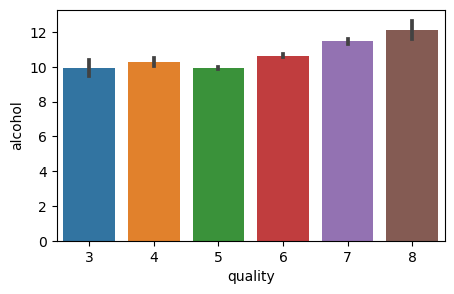

In [15]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

In [16]:
bins = (0, 5, 10)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [17]:
label_quality = LabelEncoder()

In [18]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [19]:
df['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

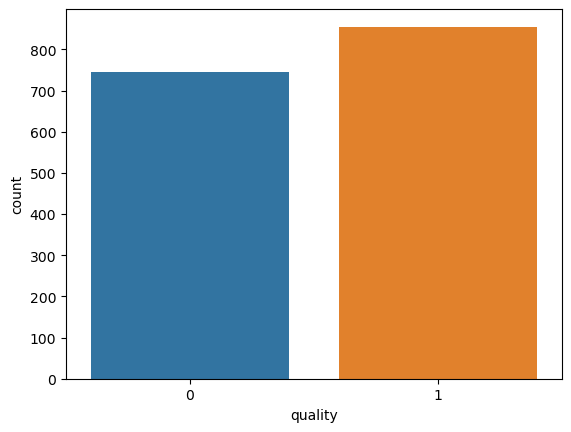

In [20]:
sns.countplot(data=df, x='quality')


In [21]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [133]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [114]:
sc = StandardScaler()

In [134]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()


In [136]:
lr = logistic.fit(x_train,y_train)


In [137]:
prediction = lr.predict(x_test)

In [138]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.7875

In [139]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       154
           1       0.78      0.81      0.80       166

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



In [140]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction))


[[117  31]
 [ 37 135]]


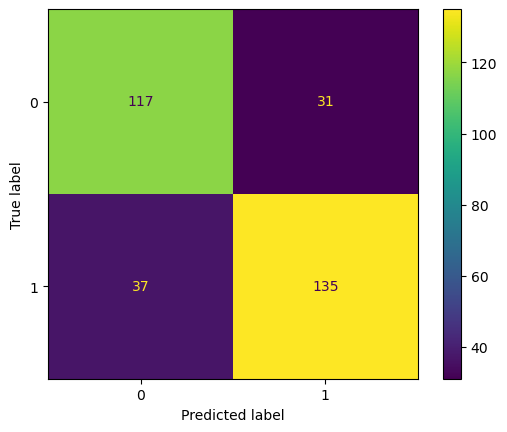

In [141]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test, values_format='d')


In [32]:
df2 = pd.read_csv('winequality-red.csv')

In [33]:
bins2 = (2, 6.5, 8)
group_names2 = ['bad', 'good']
df2['quality'] = pd.cut(df2['quality'], bins = bins2, labels = group_names2)

In [34]:
label_quality2 = LabelEncoder()

In [35]:
df2['quality'] = label_quality2.fit_transform(df2['quality'])

In [36]:
df2['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

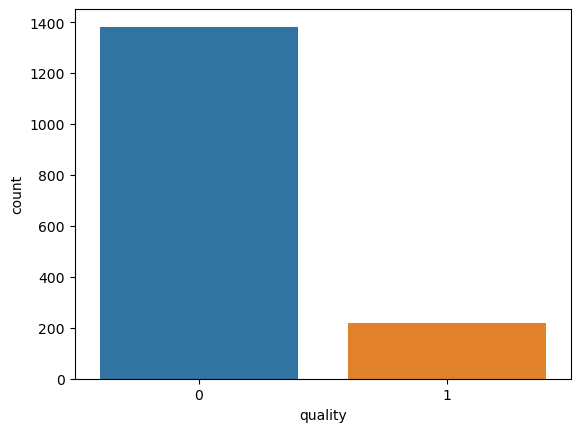

In [37]:
sns.countplot(data=df2, x='quality')


In [38]:
X2 = df2.drop('quality', axis = 1)
y2 = df2['quality']

In [109]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.25, random_state = 1234)

sc2 = StandardScaler()

x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.fit_transform(x_test2)

In [110]:
logistic2 = LogisticRegression()
lr2 = logistic.fit(x_train2,y_train2)
prediction2 = lr.predict(x_test2)


In [111]:
accuracy_score(y_test2,prediction2)

0.8875

In [112]:
print(classification_report(prediction2,y_test2))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       374
           1       0.31      0.58      0.40        26

    accuracy                           0.89       400
   macro avg       0.64      0.74      0.67       400
weighted avg       0.93      0.89      0.90       400



In [43]:
print(confusion_matrix(y_test2, prediction2))


[[340  11]
 [ 34  15]]


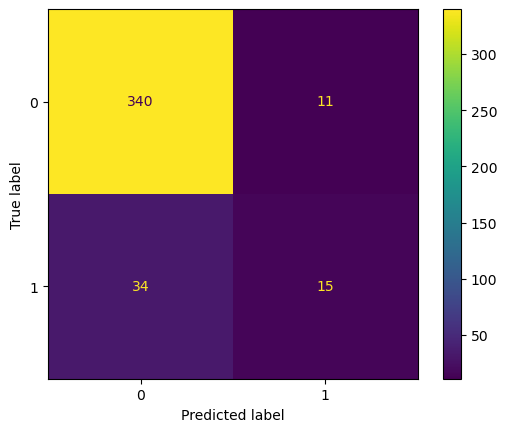

In [44]:
ConfusionMatrixDisplay.from_estimator(lr2, x_test2, y_test2, values_format='d')
